In [1]:
import numpy as np
import matplotlib.pyplot as plt


estymata pulsacji


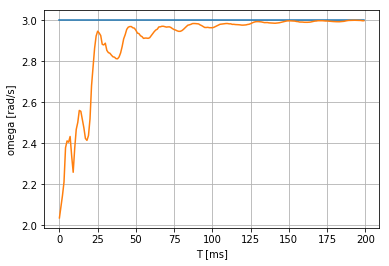

blad estymaty pulsacji


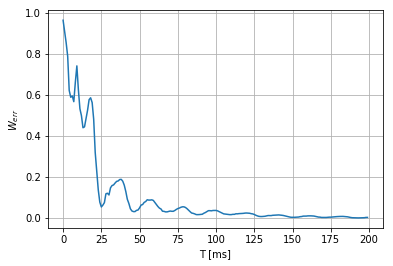

stan: przebieg f. sinusoid. + noise


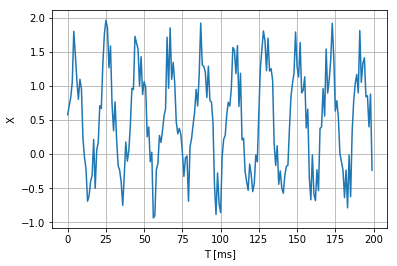

In [3]:
def kalman2d():
    """
    estymacja czestotliwosci omega
    """
    TS=.1
    A=1. #amplit.
    W=3. #omega init
    PHIS=0.#Phi init
    SIGX=1.    
    T=0. #time init
    S=0.
    H=.001
    PHI=np.zeros([2,2])# PHI = W*T
    P=np.zeros([2,2])
    IDNP=np.eye(2, 2)#identity matrix
    Q=np.zeros([2,2])#covariance
    HMAT = np.zeros([1,2])          
    #print("PHI=\n",PHI)
    #print("P=\n",P)
    #print("IDNP=\n",IDNP)
    #print("Q=\n",Q)
    #print("HMAT=\n",HMAT)
    RMAT=SIGX**2#measurement noise 
    PHIH=0.#Phi hat
    WH=2. #omega hat
    P[0][0]=0.**2
    P[1][1]=(W-WH)**2
    XT=0.
    XTD=A*W
    TablicaT = []
    TablicaW = []
    TablicaWH = []
    TablicaERRPHI = []
    TablicaSP11 = []
    TablicaSP11P = []
    TablicaERRW = []
    TablicaSP22 = []
    TablicaSP22P = []
    TablicaX = []
    
    while T<=20.0:
        XTOLD=XT
        XTDOLD=XTD
        XTDD=-W*W*XT
        XT=XT+H*XTD
        XTD=XTD+H*XTDD
        T=T+H
        XTDD=-W*W*XT
        XT=.5*(XTOLD+XT+H*XTD)
        XTD=.5*(XTDOLD+XTD+H*XTDD)
        S=S+H;
        if S>=(TS-.00001):
            S=0.
            PHI[0][0]=1.
            PHI[0][1]=TS
            PHI[1][1]=1.
            Q[0][0]=TS*TS*TS*PHIS/3.
            Q[0][1]=.5*TS*TS*PHIS
            Q[1][0]=Q[0][1]
            Q[1][1]=PHIS*TS
            PHIB=PHIH+WH*TS
            HMAT[0][0]=np.cos(PHIB)
            HMAT[0][1]=0.          

            PHIPPHIT=np.dot(np.dot(PHI,P),PHI.T)
            M=PHIPPHIT+Q
            HM=np.dot(HMAT,M)
            HMHTR=np.dot(HM,HMAT.T)+RMAT
            HMHTRINV=1./HMHTR
            K=np.dot(np.dot(M,HMAT.T),HMHTRINV)
            KH=np.dot(K,HMAT)
            P=np.dot((IDNP-KH),M)
            XTMEAS=XT+SIGX*np.random.rand()
            RES=XTMEAS-A*np.sin(PHIB)
            PHIH=PHIB+K[0][0]*RES
            WH=WH+K[1][0]*RES
            ERRPHI=W*T-PHIH
            SP11=np.sqrt(P[0][0]) #blad sredniokw           
            SP22=np.sqrt(P[1][1]) #blad sredniokw 
            ERRW=W-WH
            SP11P=-SP11
            SP22P=-SP22
            
            XTH=A*np.sin(PHIH)
            XTDH=A*WH*np.cos(PHIH)
            #zapisz wyniki obliczen
            TablicaT.append(T)
            TablicaW.append(W)
            TablicaWH.append(WH)
            TablicaERRPHI.append(ERRPHI)
            TablicaSP11.append(SP11)
            TablicaSP11P.append(SP11P)
            TablicaERRW.append(ERRW)
            TablicaSP22.append(SP22)
            TablicaSP22P.append(SP22P)
            TablicaX.append(XTMEAS)
    
    
    #estymata pulsacji
    print("estymata pulsacji")
    plt.figure()
    plt.plot(TablicaW)
    plt.plot(TablicaWH)
    plt.ylabel('omega [rad/s]')
    plt.xlabel('T [ms]')    
    plt.grid(True)
    plt.show()
    
    #blad estymaty pulsacji
    print("blad estymaty pulsacji")
    plt.figure()
    plt.plot(TablicaERRW) 
    plt.ylabel('$W_{err}$')
    plt.xlabel('T [ms]')
    plt.grid(True)
    plt.show()
    
    #stan: przebieg f. sinusoid. + noise
    print("stan: przebieg f. sinusoid. + noise")
    plt.figure()
    plt.plot(TablicaX) 
    plt.ylabel('X')
    plt.xlabel('T [ms]')
    plt.grid(True)
    plt.show()
                
                
kalman2d()
    